In [2]:
# Dependencies
import random
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from citipy import citipy
import numpy as np

In [4]:
# Save config information.

city_list=[]
for i in range(0,600):
    lat=random.choice(range(-90,90))
    lng=random.choice(range(-180,180))
    city = citipy.nearest_city(lat,lng)
    city_name = city.city_name
    city_list.append(city_name)
city_df=pd.DataFrame(city_list)
city_list
# country = city.country_code
# print(f'{lat},{lng} and {city_name}, {country}')



['port hardy',
 'okhotsk',
 'najran',
 'ketchikan',
 'deputatskiy',
 'umm lajj',
 'yar-sale',
 'new norfolk',
 'busselton',
 'jertih',
 'illoqqortoormiut',
 'mataura',
 'codrington',
 'constitucion',
 'rikitea',
 'saint-augustin',
 'the pas',
 'amderma',
 'tumannyy',
 'cave spring',
 'bluff',
 'punta arenas',
 'champerico',
 'lompoc',
 'nelson bay',
 'new norfolk',
 'kozhva',
 'mount isa',
 'taolanaro',
 'aksha',
 'cape town',
 'ewo',
 'marhaura',
 'hovorany',
 'chokurdakh',
 'qaanaaq',
 'yar-sale',
 'victoria',
 'isangel',
 'nyurba',
 'qaanaaq',
 'illoqqortoormiut',
 'vao',
 'dunedin',
 'albany',
 'vaini',
 'benghazi',
 'albany',
 'norman wells',
 'barrow',
 'chapais',
 'port blair',
 'vestmannaeyjar',
 'qasigiannguit',
 'busselton',
 'arraial do cabo',
 'hobart',
 'ribeira grande',
 'hobart',
 'lasa',
 'jamestown',
 'san patricio',
 'havelock',
 'san patricio',
 'estelle',
 'karaul',
 'hermanus',
 'katsina',
 'asadabad',
 'atuona',
 'albany',
 'nicoya',
 'hanzhong',
 'ribeira grande'

In [28]:

latt=[]
lon=[]
temp=[]
wind_speed=[]
clouds=[]
humidity=[]
date=[]
country=[]
nearest_city=[]


# Build partial query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="
c=0
while c <=599:
    response=requests.get(query_url + city_list[c]).json()
    try:
        latt.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
    # convert kelvin to F
        temp.append(round((response["main"]["temp"] - 273)*1.8 + 32,2))
    # convert m/s to mph
        wind_speed.append(round(response["wind"]["speed"]*2.23693629,2))
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        nearest_city.append(response["name"])
    except (KeyError, IndexError):
        (f'Missing Result')    
    c=c+1
    
weather_dict = {"City": nearest_city,
             "Country": country,
             "Latitude": latt,
             "Longitude": lon,
             "Temperature (F)": temp,
             "Wind Speed (mph)": wind_speed,
             "Cloudiness %": clouds,
             "Humidity %": humidity,
             "Date": date}
weather_dict
df=pd.DataFrame(weather_dict)
df
df.to_csv("WeatherPy.csv")

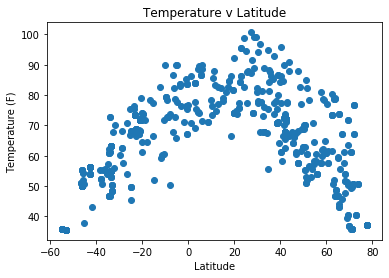

The closer latitude is to zero the higher the temperature. However, in this data set, higher temperatures are slightly skewed toward higher latitudes, implying summer months north of the equator.


<Figure size 432x288 with 0 Axes>

In [29]:
# Create a Scatter Plot for temperature vs latitude
x_values = df['Latitude']
y_values = df['Temperature (F)']
plt.scatter(x_values,y_values)
plt.title("Temperature v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()
plt.savefig('Temp_v_Lat.png')
print(f'The closer latitude is to zero the higher the temperature. However, in this data set, higher temperatures are slightly skewed toward higher latitudes, implying summer months north of the equator.')

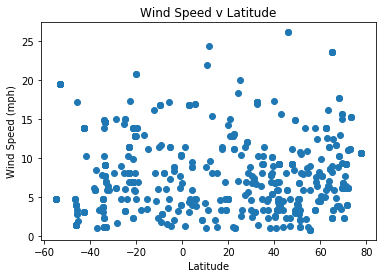

 Wind speed seems to be scattered across all latitdues.


<Figure size 432x288 with 0 Axes>

In [30]:
# Create a Scatter Plot for wind speed vs latitude
x_values = df['Latitude']
y_values = df['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.title("Wind Speed v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Wind_v_Lat.png')
print(f' Wind speed seems to be scattered across all latitdues.')

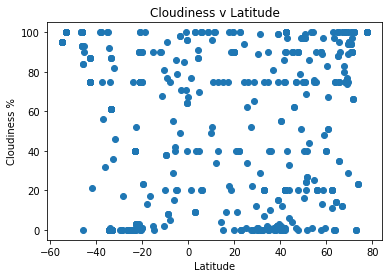

Cloudiness seems to be scattered across all latitudes.


<Figure size 432x288 with 0 Axes>

In [31]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = df['Latitude']
y_values = df['Cloudiness %']
plt.scatter(x_values,y_values)
plt.title("Cloudiness v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
plt.savefig('Cloud_v_Lat.png')
print(f'Cloudiness seems to be scattered across all latitudes.')

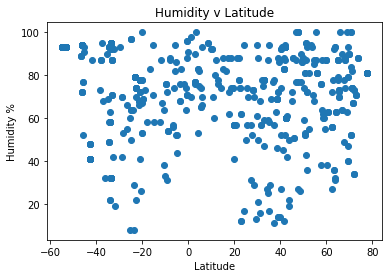

Humidity is also scattered across latitudes.


<Figure size 432x288 with 0 Axes>

In [32]:
# Create a Scatter Plot for humidity vs latitude
x_values = df['Latitude']
y_values = df['Humidity %']
plt.scatter(x_values,y_values)
plt.title("Humidity v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig('Humid_v_Lat.png')
print(f'Humidity is also scattered across latitudes.')

The r-squared is: 0.5114646120614802


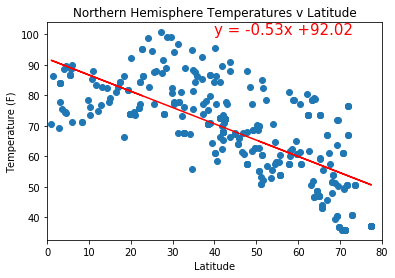

As latitude increases in the northern hemisphere, the temperature falls.


<Figure size 432x288 with 0 Axes>

In [33]:
N_df = df[df['Latitude'] > 0]

x_values = N_df['Latitude']
y_values = N_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere Temperatures v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([0,80])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,100),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Temp_v_NorthLat.png')
print(f'As latitude increases in the northern hemisphere, the temperature falls.')

The r-squared is: 0.7420789803633591


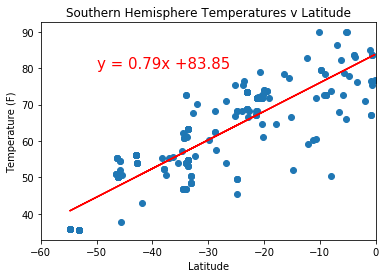

As latitude decreases in the southern hemisphere, the temperature falls.


<Figure size 432x288 with 0 Axes>

In [34]:
S_df = df[df['Latitude'] < 0]

x_values = S_df['Latitude']
y_values = S_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere Temperatures v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([-60,0])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Temp_v_SouthLat.png')
print(f'As latitude decreases in the southern hemisphere, the temperature falls.')

The r-squared is: 0.0022211541691179028


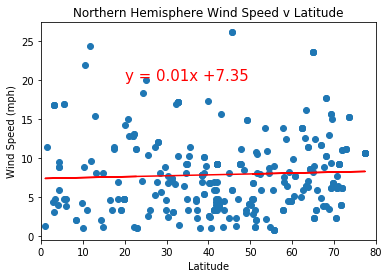

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [35]:
N_df = df[df['Latitude'] > 0]

x_values = N_df['Latitude']
y_values = N_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere Wind Speed v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([0,80])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Wind_v_NorthLat.png')
print(f'Little to no correlation.')

The r-squared is: 0.0007261076488721345


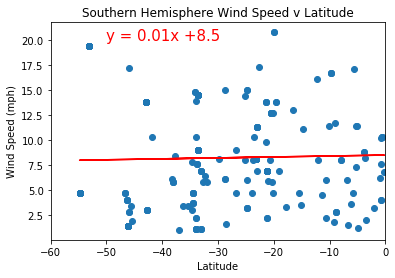

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [36]:
S_df = df[df['Latitude'] < 0]

x_values = S_df['Latitude']
y_values = S_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere Wind Speed v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([-60,0])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Wind_v_SouthLat.png')
print(f'Little to no correlation.')

The r-squared is: 0.03850213634716916


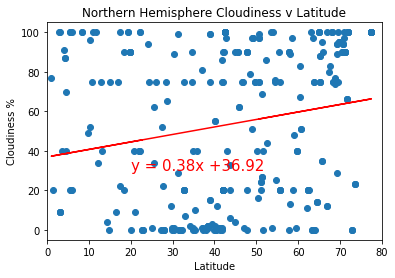

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [37]:
N_df = df[df['Latitude'] > 0]

x_values = N_df['Latitude']
y_values = N_df['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere Cloudiness v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim([0,80])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Cloud_v_NorthLat.png')
print(f'Little to no correlation.')

The r-squared is: 0.10140649519150104


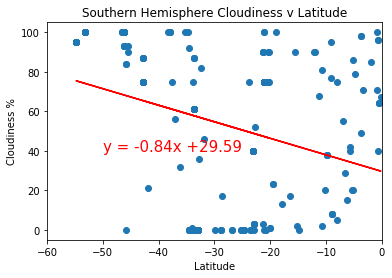

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [38]:
S_df = df[df['Latitude'] < 0]

x_values = S_df['Latitude']
y_values = S_df['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere Cloudiness v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim([-60,0])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Cloud_v_SouthLat.png')
print(f'Little to no correlation.')

The r-squared is: 0.0012873662722040786


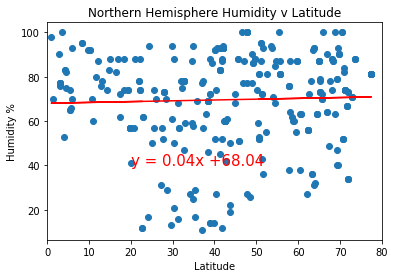

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [39]:
N_df = df[df['Latitude'] > 0]

x_values = N_df['Latitude']
y_values = N_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere Humidity v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim([0,80])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Humid_v_NorthLat.png')
print(f'Little to no correlation.')

The r-squared is: 0.044930815482405025


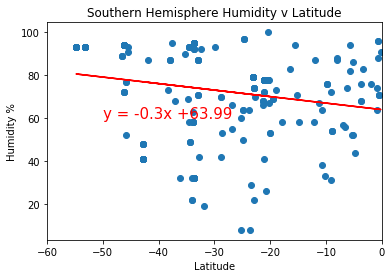

Little to no correlation.


<Figure size 432x288 with 0 Axes>

In [40]:
S_df = df[df['Latitude'] < 0]

x_values = S_df['Latitude']
y_values = S_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere Humidity v Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim([-60,0])
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('Humid_v_SouthLat.png')
print(f'Little to no correlation.')